In [12]:
import time as t
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)


In [13]:
import pandas as pd

url = "https://drive.google.com/uc?id=12iJwjM5tGevWzlo97BxF2OPiNmILCUT1"

cols = [
    "fLength","fWidth","fSize","fConc","fConc1",
    "fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"
]
df = pd.read_csv(url, header=None, names=cols)

print(df['class'].value_counts())



class
g    12332
h     6688
Name: count, dtype: int64


In [14]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [15]:
df.columns

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist', 'class'],
      dtype='object')

In [16]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [17]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [18]:
df.isnull().sum()


fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

In [19]:
# Count total duplicate rows
df.duplicated().sum()


115

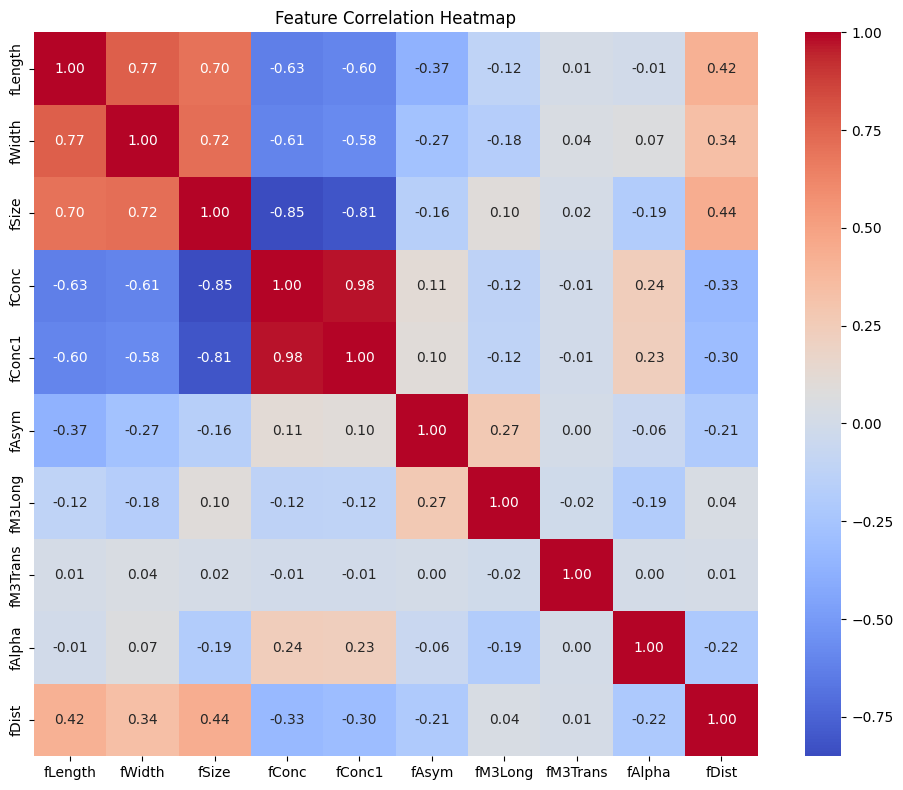

In [20]:
import seaborn as sns

df.columns = [
    "fLength", "fWidth", "fSize", "fConc", "fConc1",
    "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"
]

numeric_df = df.drop(columns=["class"])
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


<p style="font-size:22px; font-weight:bold;">Outlier Detection</p>


In [21]:
# numeric features only (exclude target)
features = df.drop(columns=["class"])

Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1

# Boolean mask: True where value is an outlier
outliers = (features < (Q1 - 1.5 * IQR)) | (features > (Q3 + 1.5 * IQR))

# Count outliers per feature
outlier_counts = outliers.sum().sort_values(ascending=False)
print(outlier_counts)


fAsym       1781
fWidth      1546
fM3Long     1218
fLength      971
fM3Trans     850
fSize        367
fConc1       150
fDist        128
fConc          0
fAlpha         0
dtype: int64


<p style="font-size:22px; font-weight:bold;">Data Balancing</p>


Original counts:
 class
g    12332
h     6688
Name: count, dtype: int64
Balanced counts:
 class
g    6688
h    6688
Name: count, dtype: int64


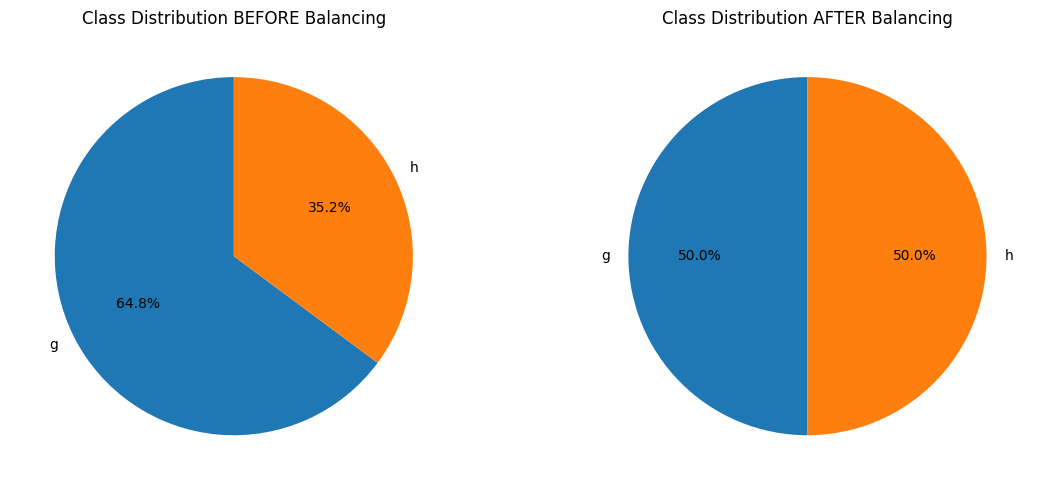

In [25]:
# Split features/target
X = df.drop(columns=["class"])
y = df["class"]

# Original class counts
print("Original counts:\n", y.value_counts())

# Plot BEFORE balancing
class_counts_before = y.value_counts()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.pie(
    class_counts_before.values,
    labels=class_counts_before.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Class Distribution BEFORE Balancing")
plt.ylabel("")

# Apply Random Under Sampling
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

# >>> create balanced DataFrame here <<<
df_balanced = pd.concat(
    [pd.DataFrame(X_res, columns=X.columns),
     pd.Series(y_res, name="class")],
    axis=1
)

# Balanced class counts
print("Balanced counts:\n", y_res.value_counts())

# Plot AFTER balancing
class_counts_after = y_res.value_counts()

plt.subplot(1, 2, 2)
plt.pie(
    class_counts_after.values,
    labels=class_counts_after.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Class Distribution AFTER Balancing")
plt.ylabel("")

plt.tight_layout()
plt.show()


In [26]:
from sklearn.model_selection import train_test_split
import pandas as pd

print(df_balanced['class'].value_counts())

X = df_balanced.drop('class', axis=1)
y = df_balanced['class']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

print("\nClass balance check:")
print("Train:\n", y_train.value_counts())
print("Validation:\n", y_val.value_counts())
print("Test:\n", y_test.value_counts())


class
g    6688
h    6688
Name: count, dtype: int64
Train: (9363, 10) (9363,)
Validation: (2006, 10) (2006,)
Test: (2007, 10) (2007,)

Class balance check:
Train:
 class
h    4682
g    4681
Name: count, dtype: int64
Validation:
 class
h    1003
g    1003
Name: count, dtype: int64
Test:
 class
g    1004
h    1003
Name: count, dtype: int64


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


In [30]:
def evaluate_and_plot(name, model, X_test, y_test):
    y_pred = model.predict(X_test)

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label="g")
    rec  = recall_score(y_test, y_pred, pos_label="g")
    f1   = f1_score(y_test, y_pred, pos_label="g")

    print(f"\n=== {name} ===")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["h", "g"])
    plt.figure(figsize=(4, 4))
    disp.plot(cmap="Blues", colorbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    return {"Model": name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1}


<p style="font-size:22px; font-weight:bold;">Decision Tree (no tuning)</p>



=== Decision Tree ===
Accuracy : 0.8007
Precision: 0.8032
Recall   : 0.7968
F1-score : 0.8000


<Figure size 400x400 with 0 Axes>

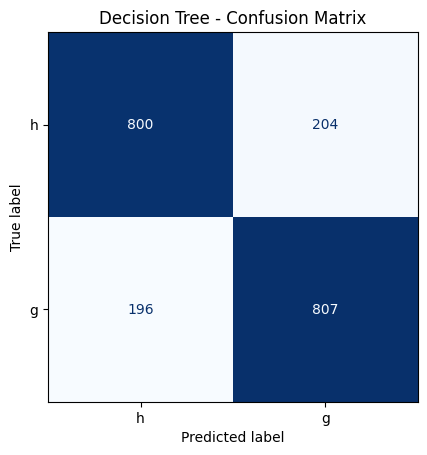

In [31]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

results = []
results.append(evaluate_and_plot("Decision Tree", dt, X_test, y_test))


<p style="font-size:22px; font-weight:bold;">AdaBoost – tune n_estimators with cross‑validation</p>


AdaBoost n_estimators=50, CV mean accuracy=0.7875
AdaBoost n_estimators=100, CV mean accuracy=0.8017
AdaBoost n_estimators=200, CV mean accuracy=0.8092
Best AdaBoost n_estimators: 200 CV accuracy: 0.8092486686653798

=== AdaBoost ===
Accuracy : 0.8057
Precision: 0.8101
Recall   : 0.7988
F1-score : 0.8044


<Figure size 400x400 with 0 Axes>

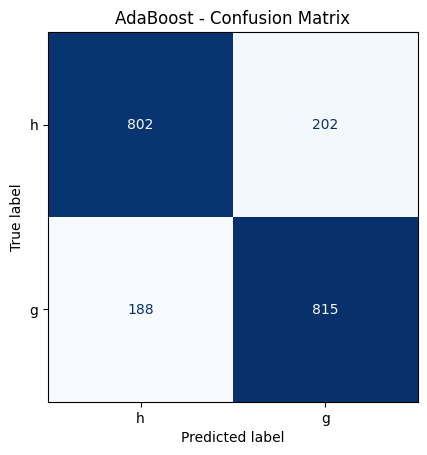

In [32]:
ada_best_n = None
ada_best_score = 0
for n in [50, 100, 200]:
    ada_tmp = AdaBoostClassifier(n_estimators=n, random_state=42)
    scores = cross_val_score(ada_tmp, X_train, y_train, cv=5, scoring="accuracy")
    print(f"AdaBoost n_estimators={n}, CV mean accuracy={scores.mean():.4f}")
    if scores.mean() > ada_best_score:
        ada_best_score = scores.mean()
        ada_best_n = n

print("Best AdaBoost n_estimators:", ada_best_n, "CV accuracy:", ada_best_score)

ada = AdaBoostClassifier(n_estimators=ada_best_n, random_state=42)
ada.fit(X_train, y_train)
results.append(evaluate_and_plot("AdaBoost", ada, X_test, y_test))


<p style="font-size:22px; font-weight:bold;"> Random Forest – tune n_estimators with cross‑validationE</p>


RandomForest n_estimators=50, CV mean accuracy=0.8553
RandomForest n_estimators=100, CV mean accuracy=0.8554
RandomForest n_estimators=200, CV mean accuracy=0.8566
Best RandomForest n_estimators: 200 CV accuracy: 0.8565631260238842

=== Random Forest ===
Accuracy : 0.8739
Precision: 0.8580
Recall   : 0.8964
F1-score : 0.8768


<Figure size 400x400 with 0 Axes>

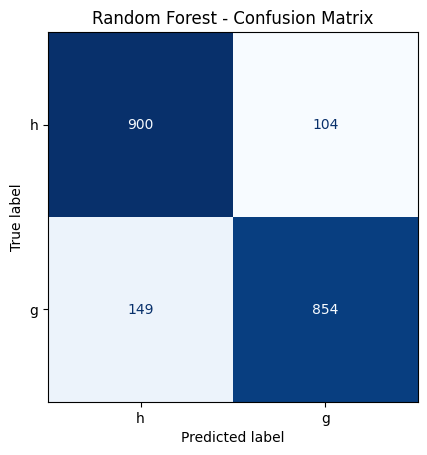

In [33]:
rf_best_n = None
rf_best_score = 0
for n in [50, 100, 200]:
    rf_tmp = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    scores = cross_val_score(rf_tmp, X_train, y_train, cv=5, scoring="accuracy")
    print(f"RandomForest n_estimators={n}, CV mean accuracy={scores.mean():.4f}")
    if scores.mean() > rf_best_score:
        rf_best_score = scores.mean()
        rf_best_n = n

print("Best RandomForest n_estimators:", rf_best_n, "CV accuracy:", rf_best_score)

rf = RandomForestClassifier(n_estimators=rf_best_n, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
results.append(evaluate_and_plot("Random Forest", rf, X_test, y_test))


<p style="font-size:22px; font-weight:bold;"> Naive Bayes (no tuning)</p>



=== Naive Bayes ===
Accuracy : 0.6597
Precision: 0.6090
Recall   : 0.8934
F1-score : 0.7243


<Figure size 400x400 with 0 Axes>

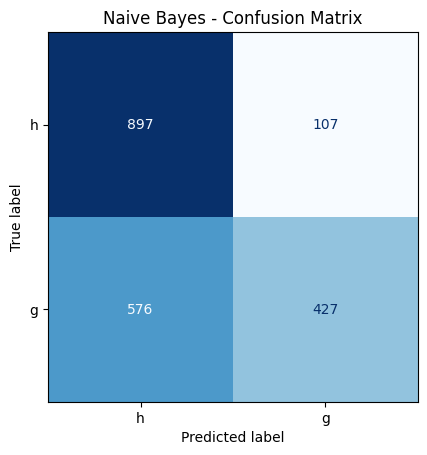

In [34]:
nb = GaussianNB()
nb.fit(X_train, y_train)
results.append(evaluate_and_plot("Naive Bayes", nb, X_test, y_test))


<p style="font-size:22px; font-weight:bold;">Evaluating 4 Models </p>


In [36]:
import pandas as pd

results_df = pd.DataFrame(results)
print("\nSummary of test performance:")
print(results_df)

# Choose best model by F1-score
best_row = results_df.loc[results_df["F1"].idxmax()]

print(
    f'\nBest model (by F1-score): {best_row["Model"]} '
    f'(Accuracy={best_row["Accuracy"]:.4f}, '
    f'Precision={best_row["Precision"]:.4f}, '
    f'Recall={best_row["Recall"]:.4f}, '
    f'F1={best_row["F1"]:.4f})'
)

print(
    "\nNote: F1-score is used to select the best model because it balances "
    "both precision and recall, while accuracy alone can hide differences "
    "in how many gamma and hadron events are misclassified."
)



Summary of test performance:
           Model  Accuracy  Precision    Recall        F1
0  Decision Tree  0.800698   0.803213  0.796813  0.800000
1       AdaBoost  0.805680   0.810101  0.798805  0.804413
2  Random Forest  0.873941   0.857960  0.896414  0.876766
3    Naive Bayes  0.659691   0.608961  0.893426  0.724263

Best model (by F1-score): Random Forest (Accuracy=0.8739, Precision=0.8580, Recall=0.8964, F1=0.8768)

Note: F1-score is used to select the best model because it balances both precision and recall, while accuracy alone can hide differences in how many gamma and hadron events are misclassified.


In [37]:
import joblib

# dt, ada, rf, nb already trained on X_train, y_train
# X_train is your training features DataFrame

# 1) Save models
joblib.dump(dt,  "dt_model_magic.pkl")
joblib.dump(ada, "ada_model_magic.pkl")
joblib.dump(rf,  "rf_model_magic.pkl")
joblib.dump(nb,  "nb_model_magic.pkl")

# 2) Save feature order (needed for Streamlit inputs)
feature_names = X_train.columns.tolist()
joblib.dump(feature_names, "magic_feature_names.pkl")

print("✅ Models and feature names saved successfully.")


✅ Models and feature names saved successfully.
